## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Business Question

A homeowner in King County wants to know what kind of improvements to make to his/her home in order to increase its value. The goal of this analysis is to determine what attributes tend to result in a higher home value, and to provide actionable insights that the homeowner can use to increase the value of his/her home. 

## Obtain

In [1]:
# Import standard packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
# Your code here - remember to use markdown cells for comments as well!

df = pd.read_csv('data/kc_house_data.csv')

display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


None

In [3]:
# df.drop(['view', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [4]:
# df.drop(['view'], axis=1, inplace=True)

In [5]:
display(df.head(5), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


None

## Scrub

In [6]:
df[df['id'].duplicated(keep=False)]

# Duplicates in id have different dates, and can be considered as resold properties.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [7]:
df[df.duplicated(keep=False)]

# There are no duplicated entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [8]:
df.drop(['date'], axis=1, inplace=True)

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df[df['bedrooms'] >= 8]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1658,9126101740,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,3,8,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580
4031,685000115,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,3,8,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100
4063,7226500100,373000.0,8,3.00,2850,12714,1.0,NaN,0.0,3,7,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942
4092,1997200215,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,3,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,3,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,3,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
6168,1873400020,340000.0,8,2.75,2790,6695,1.0,NaN,0.0,3,7,1470,1320.0,1977,NaN,98133,47.7565,-122.331,1760,7624
8537,424049043,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,3,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
8748,1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
9068,6746700615,700000.0,8,2.50,2280,3000,1.5,0.0,0.0,3,7,1210,1070.0,1911,0.0,98105,47.6675,-122.316,1610,3000


In [12]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [13]:
df.isna().sum()

id                  0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df['waterfront'].value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

In [15]:
df['waterfront'].fillna(0.0, inplace=True)

In [16]:
df['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [17]:
df['yr_renovated'].value_counts(dropna=False)

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64

In [18]:
df['yr_renovated'].fillna(0.0, inplace=True)

In [19]:
df['yr_renovated'].value_counts(dropna=False)

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [20]:
# Define function to create column with value 1 if renovated, 0 if not renovated.

def renov_bool(row):
    if row['yr_renovated'] > 0:
        val = 1
    else:
        val = 0
    return val

In [21]:
df['renovated'] = df.apply(renov_bool, axis=1)

In [22]:
df[df['renovated'] == 1]

# engineering feature "renovated" to illustrate relationship between renovation and value

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
35,9547205180,696000.0,3,2.50,2300,3060,1.5,0.0,0.0,3,...,1510,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,1
95,1483300570,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,3,...,2390,910.0,1946,1991.0,98040,47.5873,-122.249,1950,6045,1
103,2450000295,1090000.0,3,2.50,2920,8113,2.0,0.0,0.0,3,...,2920,0.0,1950,2010.0,98004,47.5814,-122.196,2370,8113,1
125,4389200955,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,3,...,1980,770.0,1914,1992.0,98004,47.6141,-122.212,3060,11275,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,6392000625,451000.0,2,1.00,900,6000,1.0,0.0,0.0,3,...,900,0.0,1944,2004.0,98115,47.6855,-122.289,1460,4800,1
20041,126039256,434900.0,3,2.00,1520,5040,2.0,0.0,0.0,3,...,1520,0.0,1977,2006.0,98177,47.7770,-122.362,1860,8710,1
20428,4305600360,500012.0,4,2.50,2400,9612,1.0,0.0,0.0,3,...,1230,1170.0,1962,2009.0,98059,47.4799,-122.127,2430,5539,1
20431,3319500628,356999.0,3,1.50,1010,1546,2.0,0.0,0.0,3,...,1010,0.0,1971,2014.0,98144,47.5998,-122.311,1010,1517,1


In [23]:
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
renovated         0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [25]:
df['sqft_basement'].value_counts().sort_index()

0.0       12826
10.0          2
100.0        42
1000.0      148
1008.0        1
          ...  
960.0        65
970.0        44
980.0        57
990.0        52
?           454
Name: sqft_basement, Length: 304, dtype: int64

In [26]:
df = df[df['sqft_basement'] != '?']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  float64
 8   view           21082 non-null  float64
 9   condition      21143 non-null  int64  
 10  grade          21143 non-null  int64  
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  object 
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

In [28]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  float64
 8   view           21082 non-null  float64
 9   condition      21143 non-null  int64  
 10  grade          21143 non-null  int64  
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

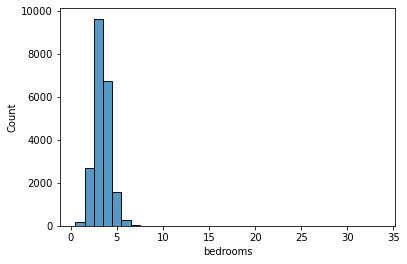

In [57]:
sns.histplot(df, x='bedrooms', discrete=True)

<AxesSubplot:xlabel='bedrooms'>

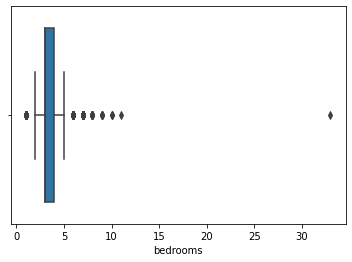

In [58]:
sns.boxplot(data=df, x='bedrooms')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

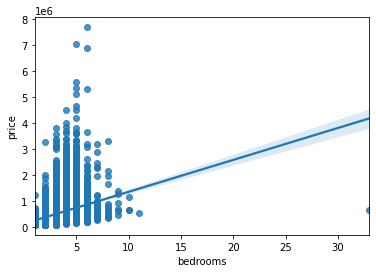

In [60]:
sns.regplot(data=df, x='bedrooms', y='price')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

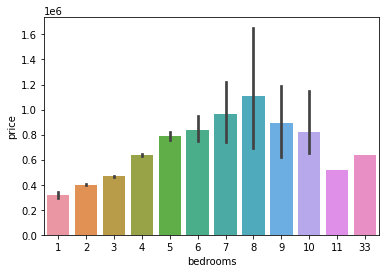

In [61]:
sns.barplot(data=df, x='bedrooms', y='price')

In [30]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21082.000000,21143.000000,...,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.006716,0.233327,3.409923,...,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967,0.034196
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,0.765066,0.650498,...,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663,0.181736
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000,0.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000,0.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000,1.000000


In [31]:
price_corr = df.corr()
price_corr.round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,...,-0.01,-0.00,0.02,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,-0.01
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,...,0.61,0.33,0.05,0.12,-0.05,0.31,0.02,0.59,0.08,0.12
bedrooms,0.00,0.31,1.00,0.51,0.58,0.03,0.18,0.00,0.08,0.03,...,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03,0.02
bathrooms,0.01,0.53,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,...,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.05
sqft_living,-0.01,0.70,0.58,0.76,1.00,0.17,0.35,0.11,0.28,-0.06,...,0.88,0.43,0.32,0.05,-0.20,0.05,0.24,0.76,0.18,0.05
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,...,0.18,0.02,0.05,0.00,-0.13,-0.09,0.23,0.14,0.72,0.00
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,...,0.52,-0.25,0.49,0.00,-0.06,0.05,0.13,0.28,-0.01,0.00
waterfront,-0.00,0.27,0.00,0.06,0.11,0.02,0.02,1.00,0.38,0.02,...,0.07,0.08,-0.02,0.07,0.03,-0.01,-0.04,0.09,0.03,0.07
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.38,1.00,0.05,...,0.17,0.28,-0.05,0.09,0.09,0.01,-0.08,0.28,0.07,0.09
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,...,-0.16,0.17,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00,-0.06


In [32]:
corr = df.drop('price', axis=1).corr().round(2)

In [33]:
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

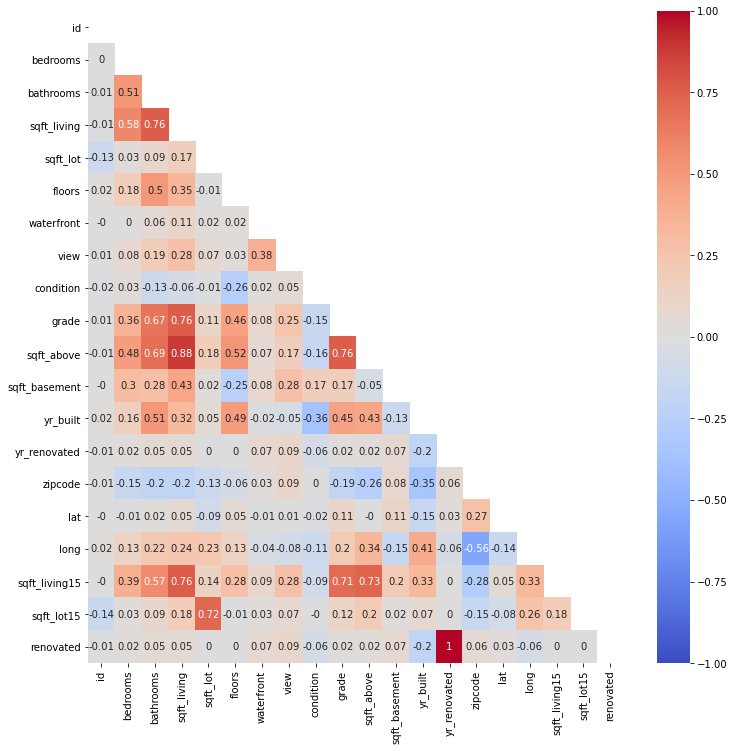

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1, mask=mask);

#https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

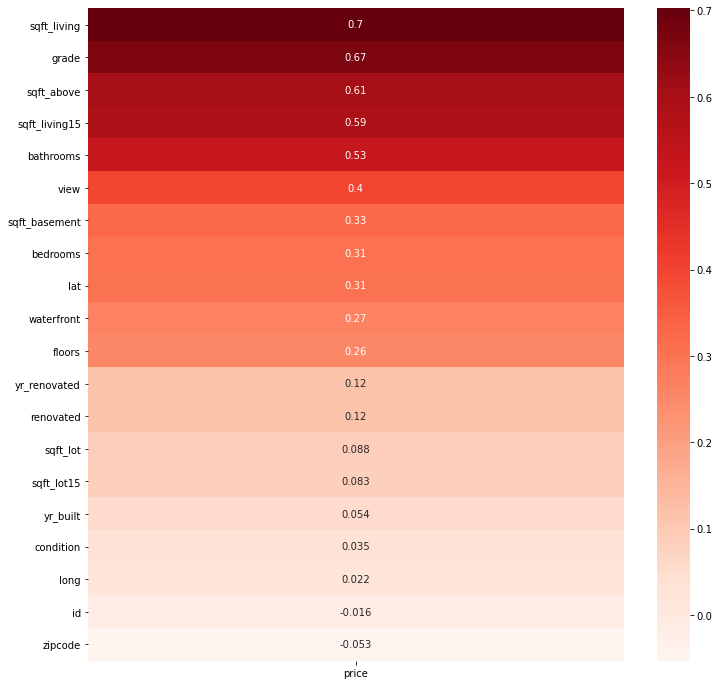

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(price_corr[['price']].drop('price').sort_values(by='price', ascending=False), annot=True, 
            ax=ax, cmap='Reds');

In [36]:
## Drop any multicollinear features
# None

In [37]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2601.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:02:19   Log-Likelihood:            -2.8729e+05
No. Observations:               21082   AIC:                         5.746e+05
Df Residuals:                   21062   BIC:                         5.748e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       7.51e+06   2.96e+06      2.541      0.011    1.72e+06    1.33e+07
id            -1.236e-06   4.87e-07     -2.539      0.011   -2.19e-06   -2.82e-07
bedrooms      -3.601e+04   1918.532    -18.771      0.000   -3.98e+04   -3.23e+04
bathrooms      3.982e+04   3295.272     12.084      0.000    3.34e+04    4.63e+04
sqft_living     109.9940      2.296     47.917      0.000     105.495     114.493
sqft_lot          0.1120      0.049      2.297      0.022       0.016       0.208
floors         7838.7662   3635.956      2.156      0.031     712.013     1.5e+04
waterfront     6.067e+05   1.84e+04     32.976      0.000    5.71e+05    6.43e+05
view           5.586e+04   2142.945     26.066      0.000    5.17e+04    6.01e+04
condition       2.77e+04   2369.349     11.693      0.000    2.31e+04    3.23e+04
grade          9.599e+04   2179.741     44.038      0.000    9.17e+04       1e+05
sqft_above       71.2292      2.272     31.353      0.000      66.776      75.682
sqft_basement    38.7671      2.674     14.496      0.000      33.525      44.009
yr_built      -2627.4591     72.654    -36.164      0.000   -2769.866   -2485.052
yr_renovated   3503.8384    486.904      7.196      0.000    2549.470    4458.207
zipcode        -591.7839     33.271    -17.787      0.000    -656.998    -526.570
lat            6.014e+05   1.08e+04     55.534      0.000     5.8e+05    6.23e+05
long          -2.162e+05   1.33e+04    -16.265      0.000   -2.42e+05    -1.9e+05
sqft_living15    22.3290      3.474      6.427      0.000      15.519      29.139
sqft_lot15       -0.3964      0.075     -5.311      0.000      -0.543      -0.250
renovated     -6.946e+06   9.72e+05     -7.147      0.000   -8.85e+06   -5.04e+06
==============================================================================
Omnibus:                    17864.143   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1810517.733
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      47.843   Cond. No.                     2.25e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
# sqft_living is highly correlated with multiple other columns, so we will drop
# since we are analyzing sqft_above and sqft_ basement which add up to sqft_living

df.drop('sqft_living', axis=1, inplace=True)

In [39]:
corr = df.drop('price', axis=1).corr()

In [40]:
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

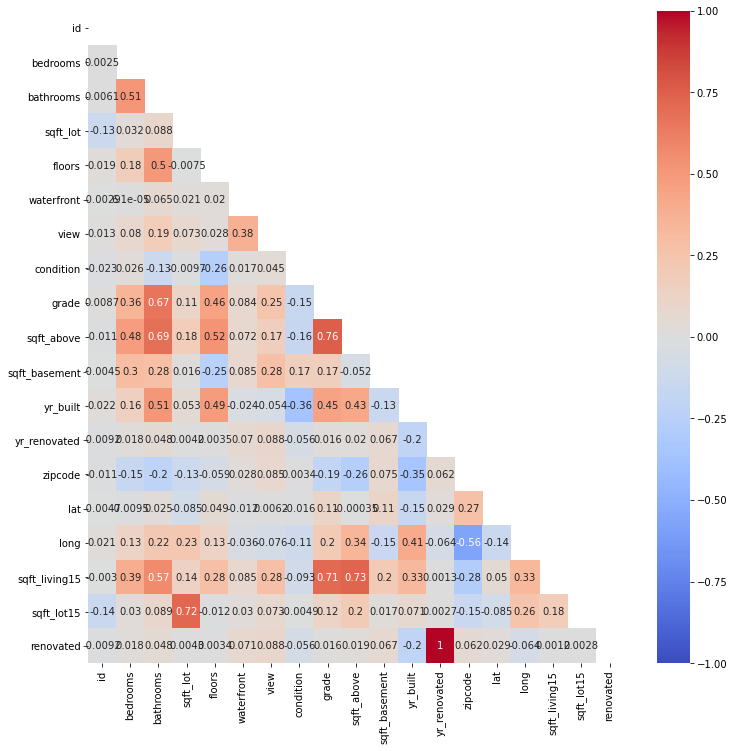

In [41]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm', vmin=-1, vmax=1, mask=mask);

#https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

In [42]:
## Drop any multicollinear features
# None

## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2601.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:02:21   Log-Likelihood:            -2.8729e+05
No. Observations:               21082   AIC:                         5.746e+05
Df Residuals:                   21062   BIC:                         5.748e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       7.51e+06   2.96e+06      2.541      0.011    1.72e+06    1.33e+07
id            -1.236e-06   4.87e-07     -2.539      0.011   -2.19e-06   -2.82e-07
bedrooms      -3.601e+04   1918.532    -18.771      0.000   -3.98e+04   -3.23e+04
bathrooms      3.982e+04   3295.272     12.084      0.000    3.34e+04    4.63e+04
sqft_lot          0.1120      0.049      2.297      0.022       0.016       0.208
floors         7838.7662   3635.956      2.156      0.031     712.013     1.5e+04
waterfront     6.067e+05   1.84e+04     32.976      0.000    5.71e+05    6.43e+05
view           5.586e+04   2142.945     26.066      0.000    5.17e+04    6.01e+04
condition       2.77e+04   2369.349     11.693      0.000    2.31e+04    3.23e+04
grade          9.599e+04   2179.741     44.038      0.000    9.17e+04       1e+05
sqft_above      181.2232      3.703     48.945      0.000     173.966     188.481
sqft_basement   148.7611      4.436     33.532      0.000     140.065     157.457
yr_built      -2627.4591     72.654    -36.164      0.000   -2769.866   -2485.052
yr_renovated   3503.8384    486.904      7.196      0.000    2549.470    4458.207
zipcode        -591.7839     33.271    -17.787      0.000    -656.998    -526.570
lat            6.014e+05   1.08e+04     55.534      0.000     5.8e+05    6.23e+05
long          -2.162e+05   1.33e+04    -16.265      0.000   -2.42e+05    -1.9e+05
sqft_living15    22.3290      3.474      6.427      0.000      15.519      29.139
sqft_lot15       -0.3964      0.075     -5.311      0.000      -0.543      -0.250
renovated     -6.946e+06   9.72e+05     -7.147      0.000   -8.85e+06   -5.04e+06
==============================================================================
Omnibus:                    17864.143   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1810517.733
Skew:                           3.544   Prob(JB):                         0.00
Kurtosis:                      47.843   Cond. No.                     1.16e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
df.drop('id', axis=1, inplace=True)

In [44]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2744.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:02:21   Log-Likelihood:            -2.8730e+05
No. Observations:               21082   AIC:                         5.746e+05
Df Residuals:                   21063   BIC:                         5.748e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.255e+06   2.95e+06      2.456      0.014    1.46e+06     1.3e+07
bedrooms      -3.602e+04   1918.778    -18.774      0.000   -3.98e+04   -3.23e+04
bathrooms      3.982e+04   3295.698     12.082      0.000    3.34e+04    4.63e+04
sqft_lot          0.1187      0.049      2.436      0.015       0.023       0.214
floors         7766.6474   3636.316      2.136      0.033     639.190    1.49e+04
waterfront     6.071e+05   1.84e+04     32.995      0.000    5.71e+05    6.43e+05
view            5.57e+04   2142.304     26.000      0.000    5.15e+04    5.99e+04
condition      2.782e+04   2369.203     11.743      0.000    2.32e+04    3.25e+04
grade          9.587e+04   2179.515     43.987      0.000    9.16e+04       1e+05
sqft_above      181.3649      3.703     48.983      0.000     174.107     188.622
sqft_basement   148.7540      4.437     33.526      0.000     140.057     157.451
yr_built      -2625.9627     72.661    -36.140      0.000   -2768.383   -2483.542
yr_renovated   3507.7508    486.964      7.203      0.000    2553.263    4462.238
zipcode        -591.7694     33.275    -17.784      0.000    -656.992    -526.547
lat            6.018e+05   1.08e+04     55.574      0.000    5.81e+05    6.23e+05
long           -2.18e+05   1.33e+04    -16.426      0.000   -2.44e+05   -1.92e+05
sqft_living15    22.3931      3.475      6.445      0.000      15.583      29.203
sqft_lot15       -0.3832      0.074     -5.147      0.000      -0.529      -0.237
renovated     -6.954e+06   9.72e+05     -7.154      0.000   -8.86e+06   -5.05e+06
==============================================================================
Omnibus:                    17844.771   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1798426.395
Skew:                           3.539   Prob(JB):                         0.00
Kurtosis:                      47.691   Cond. No.                     2.15e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
encoder = OneHotEncoder(drop='first',sparse=False)
encoder.fit(df[['zipcode']])

OneHotEncoder(drop='first', sparse=False)

In [46]:
ohe_vars = encoder.transform(df[['zipcode']])
ohe_vars
# pd.DataFrame(ohe_vars,columns=binarizer.classes_)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
encoder.get_feature_names(['zipcode'])

array(['zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', '

In [48]:
df_ohe = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(['zipcode']), index=df.index)
df_ohe

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_model = pd.concat([df.drop('zipcode',axis=1),df_ohe],axis=1)
df_model

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21595,400000.0,3,2.50,2388,2.0,0.0,0.0,3,8,1600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1033.
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:15:32   Log-Likelihood:            -2.8258e+05
No. Observations:               21082   AIC:                         5.653e+05
Df Residuals:                   20995   BIC:                         5.660e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.521e+07   6.24e+06     -4.039      0.000   -3.75e+07    -1.3e+07
bedrooms      -2.738e+04   1558.080    -17.572      0.000   -3.04e+04   -2.43e+04
bathrooms      2.243e+04   2665.073      8.415      0.000    1.72e+04    2.76e+04
sqft_lot          0.2300      0.039      5.869      0.000       0.153       0.307
floors        -4.408e+04   3201.995    -13.766      0.000   -5.04e+04   -3.78e+04
waterfront     6.742e+05    1.5e+04     45.023      0.000    6.45e+05    7.04e+05
view           5.869e+04   1761.324     33.320      0.000    5.52e+04    6.21e+04
condition      2.625e+04   1947.173     13.482      0.000    2.24e+04    3.01e+04
grade          5.719e+04   1845.480     30.988      0.000    5.36e+04    6.08e+04
sqft_above      208.6944      3.061     68.183      0.000     202.695     214.694
sqft_basement   128.7466      3.598     35.779      0.000     121.693     135.800
yr_built       -725.1467     65.111    -11.137      0.000    -852.769    -597.525
yr_renovated   2967.4568    391.286      7.584      0.000    2200.505    3734.408
lat            1.973e+05   6.41e+04      3.078      0.002    7.17e+04    3.23e+05
long          -1.373e+05   4.64e+04     -2.962      0.003   -2.28e+05   -4.65e+04
sqft_living15    10.9947      2.921      3.764      0.000       5.269      16.721
sqft_lot15       -0.1238      0.062     -2.006      0.045      -0.245      -0.003
renovated     -5.886e+06   7.81e+05     -7.537      0.000   -7.42e+06   -4.36e+06
zipcode_98002  3.591e+04   1.46e+04      2.464      0.014    7348.560    6.45e+04
zipcode_98003 -2.371e+04   1.31e+04     -1.808      0.071   -4.94e+04    1990.261
zipcode_98004  7.243e+05   2.38e+04     30.486      0.000    6.78e+05    7.71e+05
zipcode_98005  2.555e+05   2.54e+04     10.073      0.000    2.06e+05    3.05e+05
zipcode_98006  2.307e+05   2.08e+04     11.096      0.000     1.9e+05    2.71e+05
zipcode_98007  2.005e+05   2.62e+04      7.651      0.000    1.49e+05    2.52e+05
zipcode_98008  2.089e+05   2.49e+04      8.382      0.000     1.6e+05    2.58e+05
zipcode_98010  1.047e+05   2.23e+04      4.689      0.000    6.09e+04    1.48e+05
zipcode_98011   4.31e+04   3.24e+04      1.331      0.183   -2.04e+04    1.07e+05
zipcode_98014  8.777e+04   3.55e+04      2.471      0.013    1.81e+04    1.57e+05
zipcode_98019  5.024e+04   3.51e+04      1.431      0.153   -1.86e+04    1.19e+05
zipcode_98022  4.214e+04   1.95e+04      2.165      0.030    3986.686    8.03e+04
zipcode_98023 -4.628e+04   1.21e+04     -3.830      0.000      -7e+04   -2.26e+04
zipcode_98024  1.525e+05   3.14e+04      4.861      0.000     9.1e+04    2.14e+05
zipcode_98027  1.561e+05   2.14e+04      7.299      0.000    1.14e+05    1.98e+05
zipcode_98028  3.655e+04   3.15e+04      1.162      0.245   -2.51e+04    9.82e+04
zipcode_98029  1.993e+05   2.44e+04      8.159   

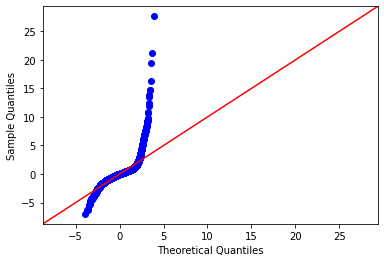

In [55]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df_model.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df_model).fit()
display(model.summary())
fig = sm.graphics.qqplot(model.resid,dist=stats.norm,fit=True,line='45')

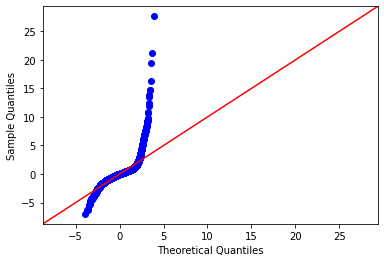

In [51]:
fig = sm.graphics.qqplot(model.resid,dist=stats.norm,fit=True,line='45')

In [52]:
df2 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

<ipython-input-52-7f06c6a5e059>:1: RuntimeWarning: invalid value encountered in less
  df2 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]


In [53]:
df2

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated


In [54]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df2.drop('price',axis=1).columns)

## Create the final formula and create the model
f  = "price~"+features

model = smf.ols(f, df2).fit()
model.summary()

ValueError: zero-size array to reduction operation maximum which has no identity

## Assumptions of Linear Regression
There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.

Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.

No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.

Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

In [ ]:
df

In [ ]:
## Create a string representing the right side of the ~ in our formula
features = ' + '.join(df2.drop('price',axis=1).columns)
## Create the final formula and create the model
f  = "price~"+features
model = smf.ols(f, df2).fit()
model.summary()